<a href="https://colab.research.google.com/github/Geon27/4-1-Bitcoin/blob/main/time_series_forecast_python_(%EB%B6%84%EC%84%9D%EC%8B%A4%EB%AC%B4%2C_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C)%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B81115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/seoul-bike-analysis/blob/master/time-series-forecast.ipynb)

# 시계열 분석
* 시계열 데이터 : 주가, 환율, 거래량, 판매량, 재고량, 수요량, 클릭률, 기온, 습도, 인구, 출생률, 트래픽양의 피크시간 패턴, 제품의 판매주기, 심장 박동
* 시계열 데이터의 특성을 파악
    * 규칙적 : 경향(trend), 계절성(seasonality), 주기(cycle)
    * 불규칙적 : 불규칙성(irregular, random)


* 추세 파악 
: 무작위 적인 소음을 제거하여 흐름을 파악
* 원인 예측 및 대응
: 수요 분석을 통한 재고량 관리
* 전망
: 영업 전략, 생산 계획




### 정상 시계열(stationary)
 * 뚜렷한 추세가 없음
 * 진폭이 흐름에 따라 일정함

### 비정상 시계열(non-stationary)
 * 평균이 시간대에 따라 다름
 * 추세, 계절성을 가짐
 * 분산이 변한다
 * 분산이 일정하지 않으면 특정 기간에 오류가 발생하고 예측을 하기에 적합하지 않을 수 있다.


### 비정상 시계열의 정상화


1. 분산이 일정하지 않은 경우 
 * 분산 안정화 변환(로그변환, 제곱근 변환, Box-Cox 변환)
2. 추세가 있을 때
 * 결정적 추세 : 분해법 또는 추세항 모형에 포함
 * 확률적 추세(Dickey-Fuller의 단위근 검정): 차분을 이용 Trend 제거
 * 로그변환(lograithm) : 표준편차가 자료의 크기에 비례 해서 증가 할 때
3. 계절성을 가지는 경우
 * 결정적 계절추세 : 계절 추세항 모형에 포함
 * 확률적 계절추세(계절형 단위근 검정) : 계절차분 
 



*   정상시계열과 비정상시계열

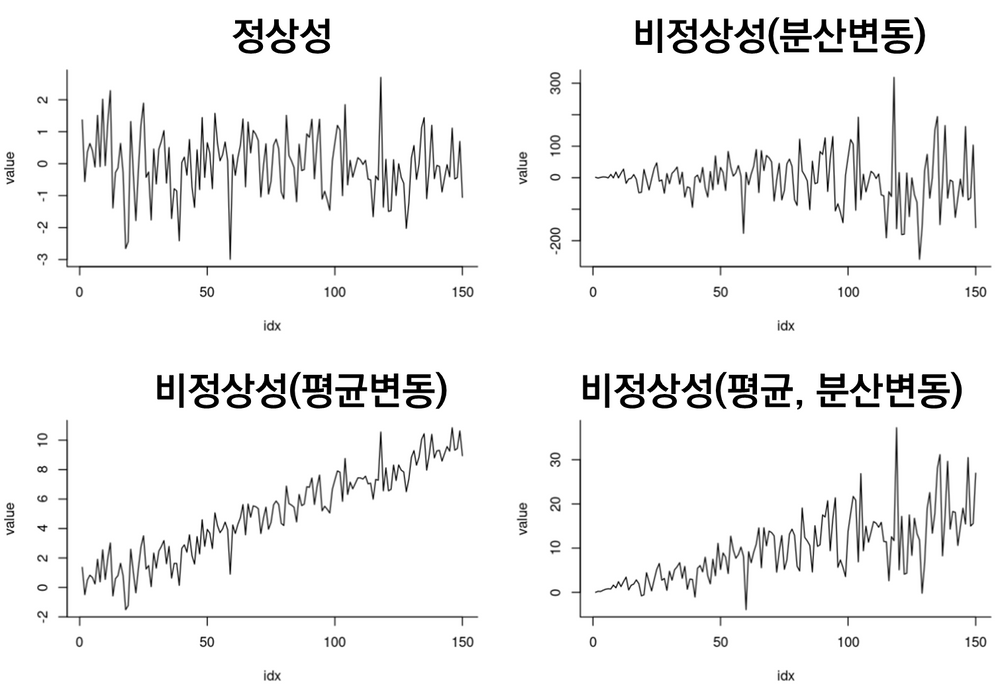

## 비트코인의 과거 데이터를 활용한 분석
* 2022년 1월 1일 ~ 2022년 10월 11일까지의 데이터를 활용
* BTC - USD($)로 표기


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')
%matplotlib inline

## Colab 에서 실행을 위한 코드

* https://colab.research.google.com/github/corazzon/seoul-bike-analysis/blob/master/time-series-forecast.ipynb
* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리한다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러온다.

In [ ]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

## 구글 드라이브에서 데이터 가져오기  
* 1번정도 실행해 보고 안정적 운영을 위해 데이터를 나의 구글 드라이브로 옮겨서 마운트(구글 코랩과 나의 구글 드라이브의 연결)하여 불러오는 것을 권장  
* 아래 코드는 1번 실행하고 주석으로 처리하는 것을 권장

In [ ]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증을 한다.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# # 공유 가능한 링크로 파일 가져오기
# url ='https://drive.google.com/open?id=1ngU6y2Fl0cz6ckCuWvXSHKs5aLsh48TH'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/bike-station-207.csv')  

## 한글폰트 사용을 위한 셋팅

In [ ]:
# http://corazzon.github.io/matplotlib_font_setting
# 한글폰트 불러오기: 런타임을 다시 시작한 후 적용되기 때문에 실행 후
# 런타임 다시 시작(ctrl+M.) 후 다시 한번 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic') 
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

Text(0.5, 0, '시간(분)')

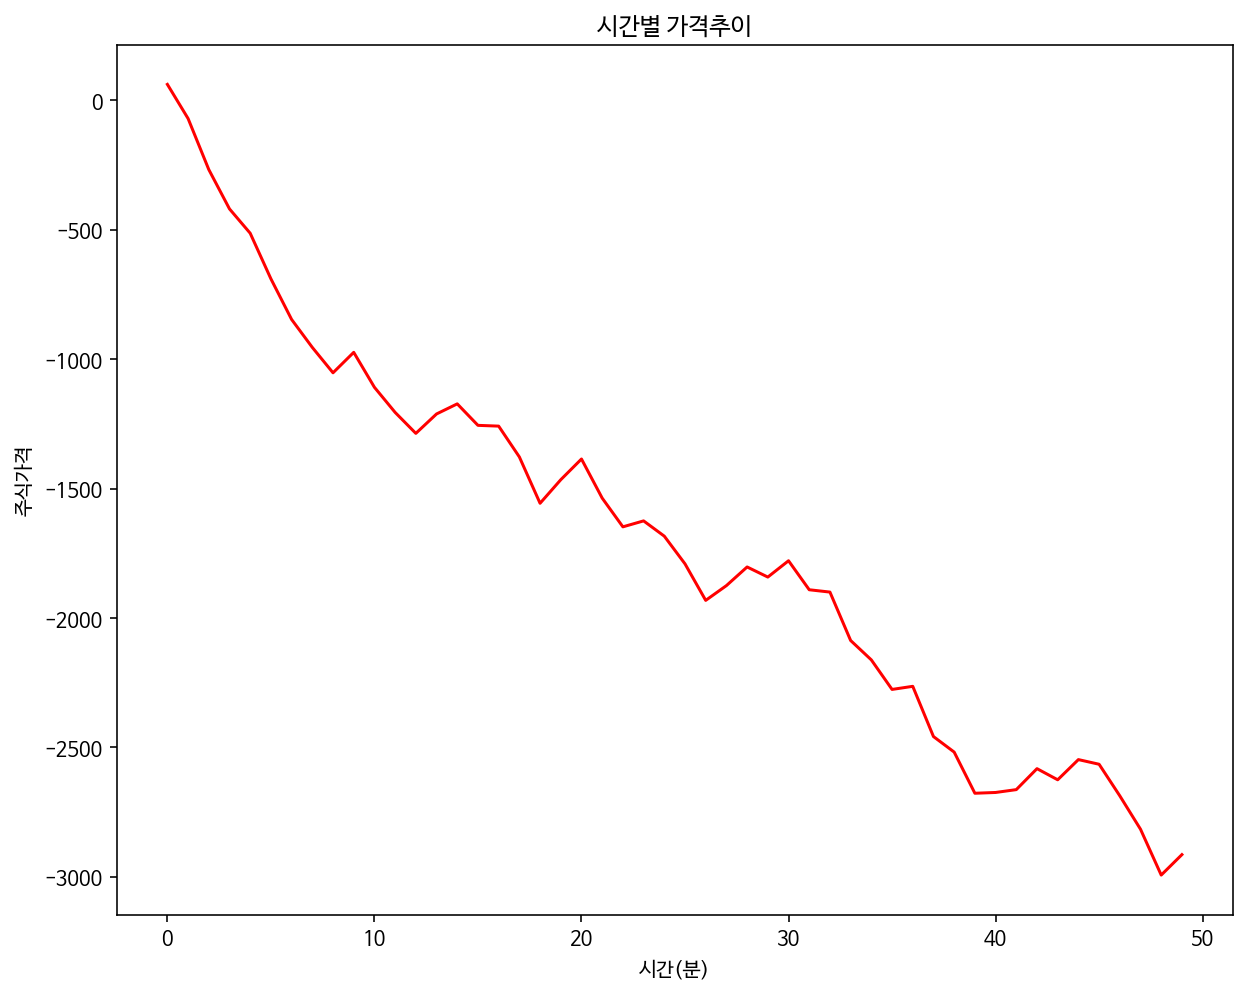

In [ ]:
# 한글그래프 되는지 확인
# 데이터 준비
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
data
# 한글을 넣어놓고 그러보면 깨진다, 런타임 다시 실행시 한글이 나타남
plt.figure(figsize=(10,8)); plt.plot(range(50), data, 'r'); plt.title('시간별 가격추이')
plt.ylabel('주식가격'); plt.xlabel('시간(분)')

## 구글 드라이브 마운트  
* 데이터의 로드와 저장을 위해서 구글 코랩과 나의 구글 드라이브의 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## csv 파일로드

In [ ]:
#df = pd.read_csv("data/bike-station-207.csv", low_memory=False)
df = pd.read_csv("/content/drive/MyDrive/비트코인_시계열/2020.1 ~ 2022.11.csv", low_memory=False)
df.shape

(1036, 7)

In [ ]:
df.head(15)

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2020-01-01,"7,199.80","7,196.40","7,259.40","7,180.00",420.28K,0.05%
1,2020-01-02,"6,967.00","7,199.70","7,209.60","6,901.40",632.78K,-3.23%
2,2020-01-03,"7,343.10","6,967.10","7,402.90","6,884.10",936.29K,5.40%
3,2020-01-04,"7,376.80","7,345.10","7,433.10","7,291.40",523.91K,0.46%
4,2020-01-05,"7,372.50","7,376.80","7,501.00","7,345.60",628.14K,-0.06%
5,2020-01-06,"7,759.10","7,372.60","7,783.10","7,366.70",786.75K,5.24%
6,2020-01-07,"8,155.70","7,759.10","8,182.00","7,754.10",1.01M,5.11%
7,2020-01-08,"8,059.60","8,154.20","8,436.40","7,900.80",1.19M,-1.18%
8,2020-01-09,"7,842.40","8,060.00","8,065.90","7,779.20",786.50K,-2.70%
9,2020-01-10,"8,187.10","7,842.50","8,187.40","7,697.70",1.05M,4.40%


In [ ]:
df.tail(15)

,날짜,종가,오픈,고가,저가,거래량,변동 %
1021,2022-10-18,"19,328.20","19,548.40","19,692.90","19,102.80",290.07K,-1.13%
1022,2022-10-19,"19,123.90","19,328.20","19,358.60","19,101.20",209.28K,-1.06%
1023,2022-10-20,"19,042.90","19,125.10","19,334.50","18,935.60",253.20K,-0.42%
1024,2022-10-21,"19,162.60","19,042.90","19,245.50","18,703.30",294.66K,0.63%
1025,2022-10-22,"19,204.80","19,162.60","19,249.90","19,116.10",118.24K,0.22%
1026,2022-10-23,"19,571.20","19,204.80","19,680.90","19,092.50",180.63K,1.91%
1027,2022-10-24,"19,331.50","19,571.20","19,588.60","19,177.20",286.94K,-1.22%
1028,2022-10-25,"20,082.70","19,331.80","20,406.90","19,249.00",371.54K,3.89%
1029,2022-10-26,"20,769.50","20,086.80","20,981.50","20,062.90",427.99K,3.42%
1030,2022-10-27,"20,292.90","20,769.50","20,867.90","20,231.60",365.49K,-2.29%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1036 non-null   object
 1   종가      1036 non-null   object
 2   오픈      1036 non-null   object
 3   고가      1036 non-null   object
 4   저가      1036 non-null   object
 5   거래량     1036 non-null   object
 6   변동 %    1036 non-null   object
dtypes: object(7)
memory usage: 56.8+ KB


In [ ]:
df.columns

Index(['날짜', '종가', '오픈', '고가', '저가', '거래량', '변동 %'], dtype='object')

In [ ]:
pd.Series(df.columns)

0      날짜
1      종가
2      오픈
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [ ]:
# df["대여연월"] = df["대여일시"].apply(lambda x : x[:7])
# df["반납연월"] = df["반납일시"].apply(lambda x : x[:7])

In [ ]:
# 람다의 이해
(lambda x,y: x + y)(10, 20)

30

* apply함수의 이해   
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wideeyed&logNo=221559041280  
https://letalearns.tistory.com/30

In [ ]:
df.head(6)

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2020-01-01,"7,199.80","7,196.40","7,259.40","7,180.00",420.28K,0.05%
1,2020-01-02,"6,967.00","7,199.70","7,209.60","6,901.40",632.78K,-3.23%
2,2020-01-03,"7,343.10","6,967.10","7,402.90","6,884.10",936.29K,5.40%
3,2020-01-04,"7,376.80","7,345.10","7,433.10","7,291.40",523.91K,0.46%
4,2020-01-05,"7,372.50","7,376.80","7,501.00","7,345.60",628.14K,-0.06%
5,2020-01-06,"7,759.10","7,372.60","7,783.10","7,366.70",786.75K,5.24%


In [ ]:
## 연도와 월별을 합친 데이터
df["날짜연월"] = df["날짜"].apply(lambda x : x[:7])

In [ ]:
# object 타입에는 .dt accessor를 사용할 수 없기 때문에
# 대여일시와 반납일시를 datetime 형태로 변환해 줍니다.
# df["대여일시"] = pd.to_datetime(df["대여일시"])
# df["반납일시"] = pd.to_datetime(df["반납일시"])

# df[["대여일시", "반납일시"]].dtypes

In [ ]:
# df["대여연도"] = df["대여일시"].dt.year
# df["대여월"] = df["대여일시"].dt.month
# df["대여일"] = df["대여일시"].dt.day
# df["대여시간"] = df["대여일시"].dt.hour
# df["대여요일"] = df["대여일시"].dt.dayofweek
# df["대여일자"] = df["대여일시"].dt.date

# df.sample()

In [ ]:
# df["반납연도"] = df["반납일시"].dt.year
# df["반납월"] = df["반납일시"].dt.month
# df["반납일"] = df["반납일시"].dt.day
# df["반납시간"] = df["반납일시"].dt.hour
# df["반납요일"] = df["반납일시"].dt.dayofweek
# df["반납일자"] = df["반납일시"].dt.date

# df.sample()

##  일별 데이터를 월별 / 년도별로 구분
https://coding-grandpa.tistory.com/entry/PythonTimeSeries-Date%EC%99%80-DateTime-%EC%8B%AC%ED%99%94-Resample-Groupby

In [ ]:
# 날짜 형식을 datetime의 type로 변환
df["날짜"] = pd.to_datetime(df["날짜"])          

In [ ]:
# df의 전체 값 확인
df

,날짜,종가,오픈,고가,저가,거래량,변동 %,날짜연월
0,2020-01-01,"7,199.80","7,196.40","7,259.40","7,180.00",420.28K,0.05%,2020-01
1,2020-01-02,"6,967.00","7,199.70","7,209.60","6,901.40",632.78K,-3.23%,2020-01
2,2020-01-03,"7,343.10","6,967.10","7,402.90","6,884.10",936.29K,5.40%,2020-01
3,2020-01-04,"7,376.80","7,345.10","7,433.10","7,291.40",523.91K,0.46%,2020-01
4,2020-01-05,"7,372.50","7,376.80","7,501.00","7,345.60",628.14K,-0.06%,2020-01
...,...,...,...,...,...,...,...,...
1031,2022-10-28,"20,594.40","20,293.00","20,744.00","20,058.20",318.90K,1.49%,2022-10
1032,2022-10-29,"20,809.80","20,594.20","21,038.10","20,561.90",276.54K,1.05%,2022-10
1033,2022-10-30,"20,626.30","20,809.40","20,922.30","20,522.50",207.63K,-0.88%,2022-10
1034,2022-10-31,"20,496.30","20,626.00","20,822.40","20,260.00",327.47K,-0.63%,2022-10


In [ ]:
# df["날짜"]의 data type값 확인 - datetime64[ns]로 변경
df["날짜"]

0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-04
4      2020-01-05
          ...    
1031   2022-10-28
1032   2022-10-29
1033   2022-10-30
1034   2022-10-31
1035   2022-11-01
Name: 날짜, Length: 1036, dtype: datetime64[ns]

In [ ]:
## df를 index 형태로 변환 
df.set_index('날짜', inplace=True)
df

,종가,오픈,고가,저가,거래량,변동 %,날짜연월
날짜,,,,,,,
2020-01-01,"7,199.80","7,196.40","7,259.40","7,180.00",420.28K,0.05%,2020-01
2020-01-02,"6,967.00","7,199.70","7,209.60","6,901.40",632.78K,-3.23%,2020-01
2020-01-03,"7,343.10","6,967.10","7,402.90","6,884.10",936.29K,5.40%,2020-01
2020-01-04,"7,376.80","7,345.10","7,433.10","7,291.40",523.91K,0.46%,2020-01
2020-01-05,"7,372.50","7,376.80","7,501.00","7,345.60",628.14K,-0.06%,2020-01
...,...,...,...,...,...,...,...
2022-10-28,"20,594.40","20,293.00","20,744.00","20,058.20",318.90K,1.49%,2022-10
2022-10-29,"20,809.80","20,594.20","21,038.10","20,561.90",276.54K,1.05%,2022-10
2022-10-30,"20,626.30","20,809.40","20,922.30","20,522.50",207.63K,-0.88%,2022-10


In [ ]:
# df에 각각 'month', 'year' 이라는 columns 추가 후 df 전체 확인
df['month']=df.index.month 
df['year']=df.index.year 
df

,종가,오픈,고가,저가,거래량,변동 %,날짜연월,month,year
날짜,,,,,,,,,
2020-01-01,"7,199.80","7,196.40","7,259.40","7,180.00",420.28K,0.05%,2020-01,1,2020
2020-01-02,"6,967.00","7,199.70","7,209.60","6,901.40",632.78K,-3.23%,2020-01,1,2020
2020-01-03,"7,343.10","6,967.10","7,402.90","6,884.10",936.29K,5.40%,2020-01,1,2020
2020-01-04,"7,376.80","7,345.10","7,433.10","7,291.40",523.91K,0.46%,2020-01,1,2020
2020-01-05,"7,372.50","7,376.80","7,501.00","7,345.60",628.14K,-0.06%,2020-01,1,2020
...,...,...,...,...,...,...,...,...,...
2022-10-28,"20,594.40","20,293.00","20,744.00","20,058.20",318.90K,1.49%,2022-10,10,2022
2022-10-29,"20,809.80","20,594.20","21,038.10","20,561.90",276.54K,1.05%,2022-10,10,2022
2022-10-30,"20,626.30","20,809.40","20,922.30","20,522.50",207.63K,-0.88%,2022-10,10,2022


In [ ]:
# "날짜"와 'year', 'month' 의 값 확인 
df.groupby(['year', 'month'])
df['year']

날짜
2020-01-01    2020
2020-01-02    2020
2020-01-03    2020
2020-01-04    2020
2020-01-05    2020
              ... 
2022-10-28    2022
2022-10-29    2022
2022-10-30    2022
2022-10-31    2022
2022-11-01    2022
Name: year, Length: 1036, dtype: int64

In [ ]:
# month' 의 값 확인 
df['month']

날짜
2020-01-01     1
2020-01-02     1
2020-01-03     1
2020-01-04     1
2020-01-05     1
              ..
2022-10-28    10
2022-10-29    10
2022-10-30    10
2022-10-31    10
2022-11-01    11
Name: month, Length: 1036, dtype: int64

In [ ]:
#df["대여시간"].value_counts().sort_values(ascending=True)
# df["거래량"].value_counts().sort_index()
df["year"].sort_index()

날짜
2020-01-01    2020
2020-01-02    2020
2020-01-03    2020
2020-01-04    2020
2020-01-05    2020
              ... 
2022-10-28    2022
2022-10-29    2022
2022-10-30    2022
2022-10-31    2022
2022-11-01    2022
Name: year, Length: 1036, dtype: int64

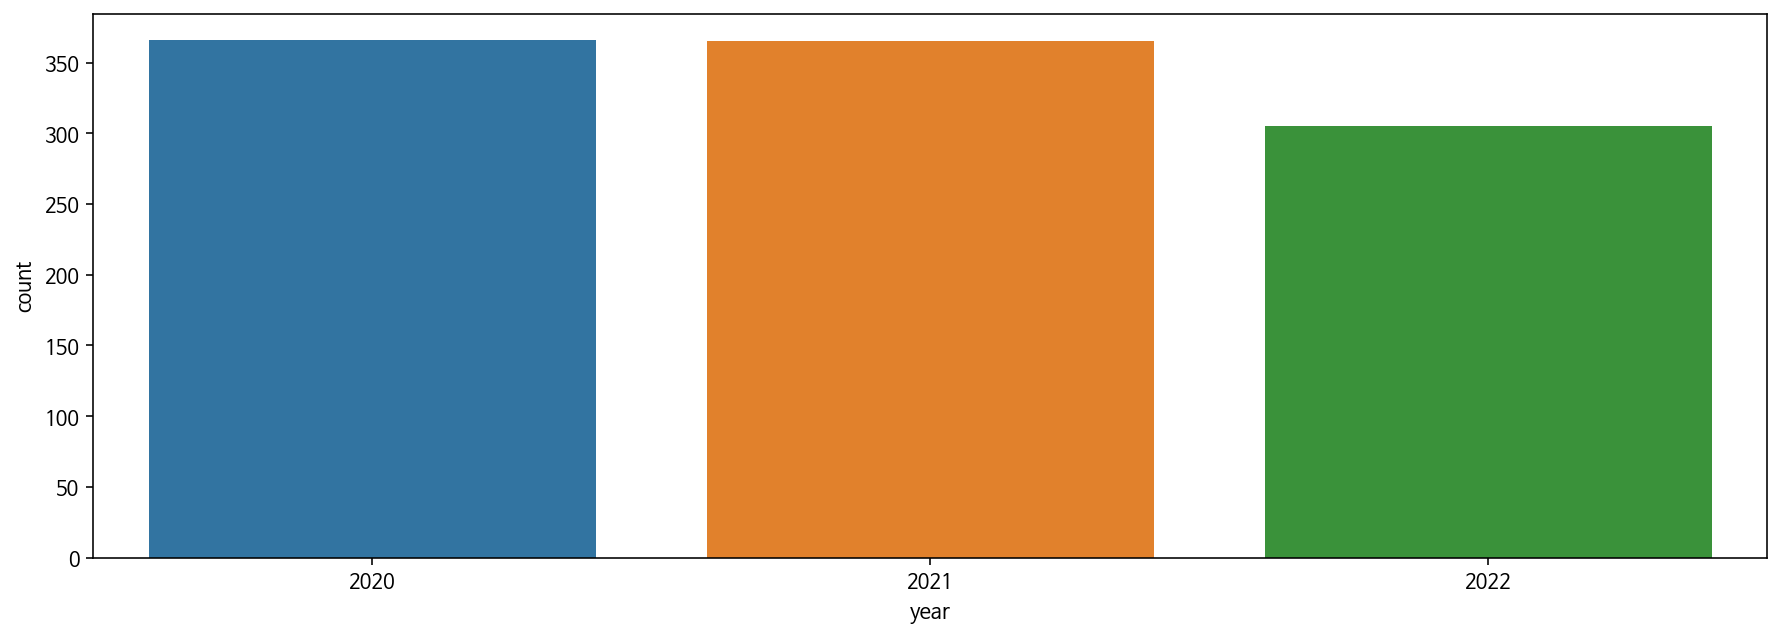

In [ ]:
  # 수치를 집계해보기 전에 countplot으로 분석, 'year'의 값 확인
  plt.figure(figsize=(15, 5))
  sns.countplot(data=df, x="year")

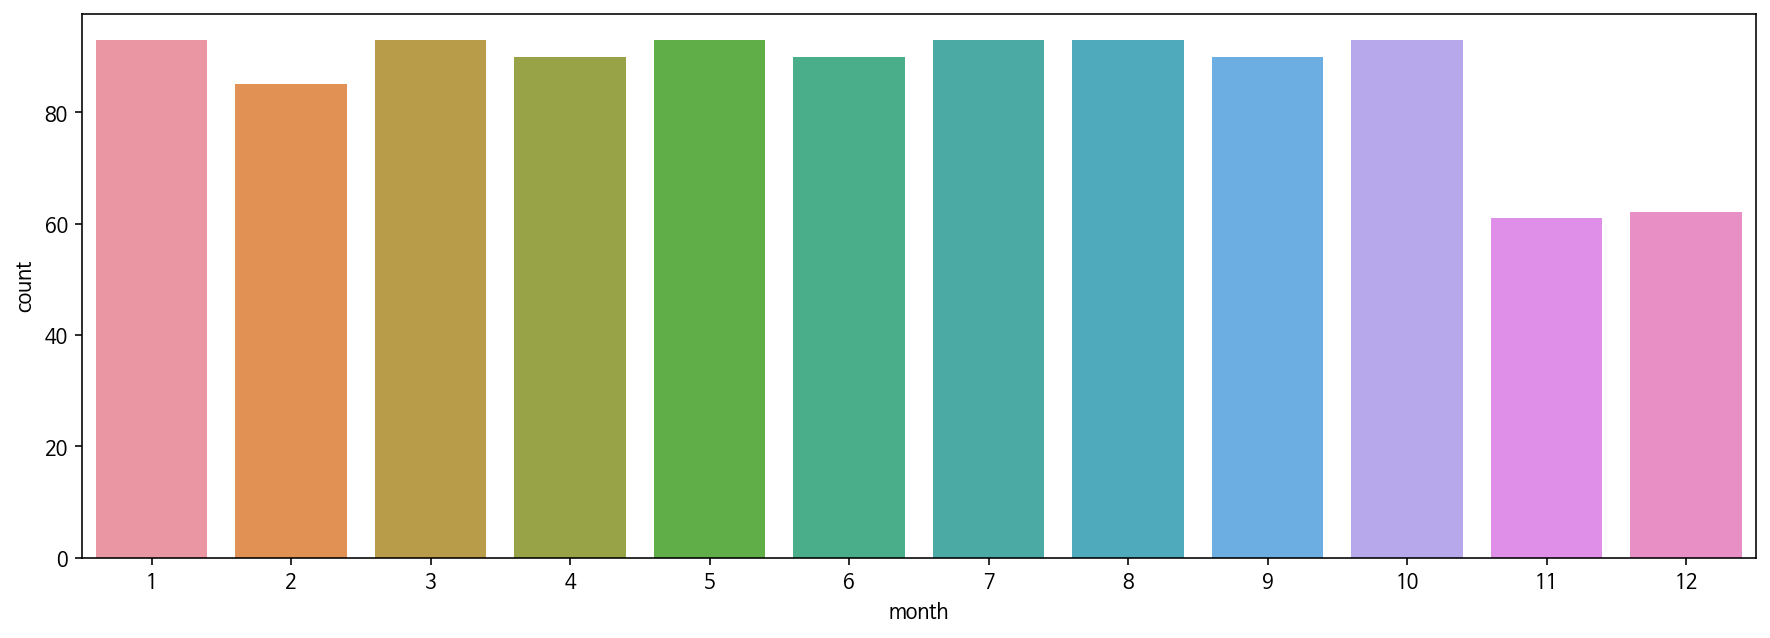

In [ ]:
# 수치를 집계해보기 전에 countplot으로 분석, 'month'의 값 확인
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="month")

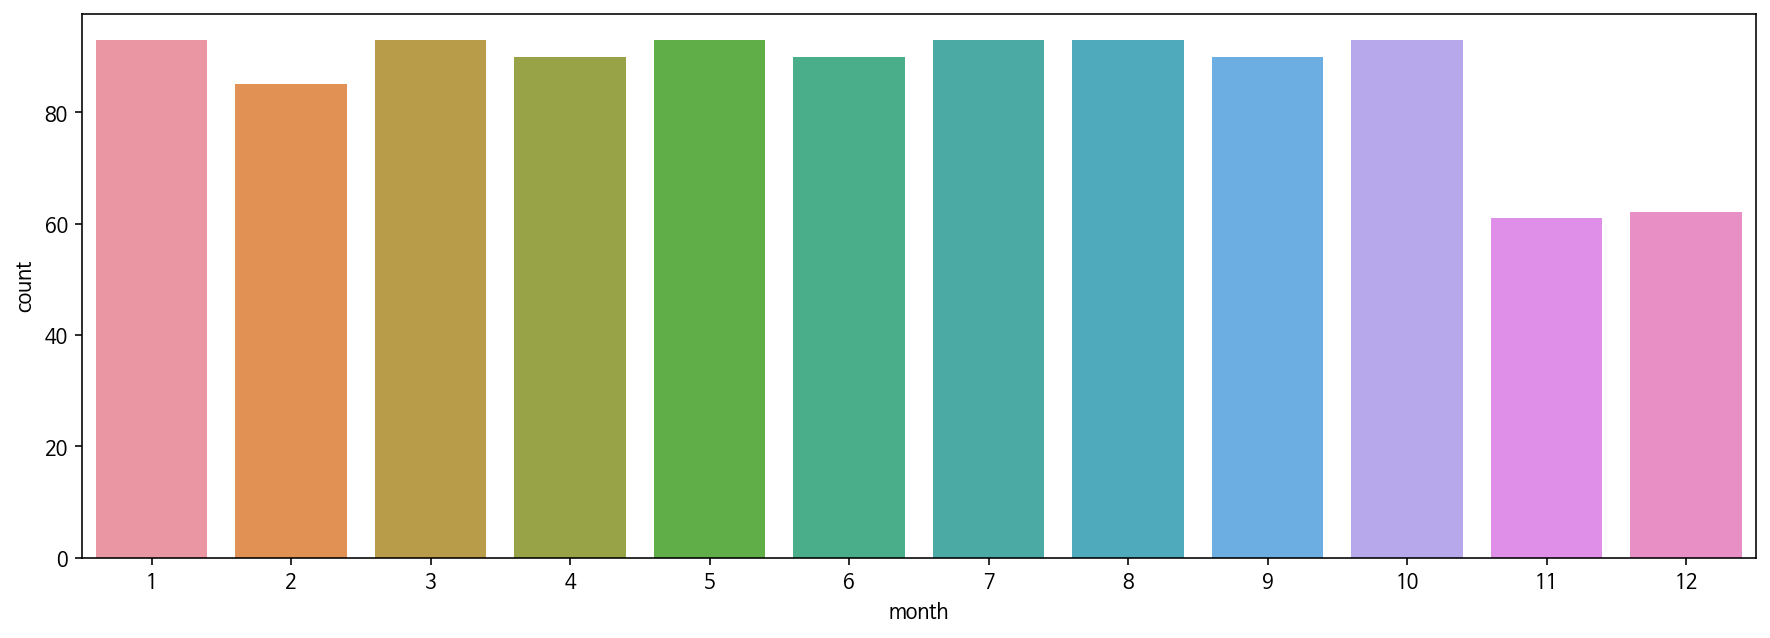

In [ ]:
# 연도별 데이터를 보면 모든 월 데이터가 있지 않다. 따라서 count 값으로 시각화를 하는 것은 적절하지 않다.(평균이나 다른 수치로 보도록 한다.)
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="month")

### 월별 / 년도별 거래량, 변동량 확인

In [ ]:
# value 값은 "대여일시"로 넣어주었는데 어떤 컬럼을 넣어주어도 count값을 동일하게 구한다.
# 대여일자로 구하게 되면 reset_index()에서 컬럼명이 중복되기 때문에 오류가 발생해서 다른 컬럼으로 구해왔다.
df_rent_group = df.groupby(["날짜","month","종가","거래량","오픈","변동 %","고가","저가"])['year'].count()
df_rent_group.head()

날짜          month  종가        거래량      오픈        변동 %    고가        저가      
2020-01-01  1      7,199.80  420.28K  7,196.40  0.05%   7,259.40  7,180.00    1
2020-01-02  1      6,967.00  632.78K  7,199.70  -3.23%  7,209.60  6,901.40    1
2020-01-03  1      7,343.10  936.29K  6,967.10  5.40%   7,402.90  6,884.10    1
2020-01-04  1      7,376.80  523.91K  7,345.10  0.46%   7,433.10  7,291.40    1
2020-01-05  1      7,372.50  628.14K  7,376.80  -0.06%  7,501.00  7,345.60    1
Name: year, dtype: int64

In [ ]:
df_rent = pd.DataFrame(df_rent_group).reset_index()
df_rent.columns = ["날짜","month","종가","거래량","오픈","변동 %","고가","저가",""]
df_rent.head()

,날짜,month,종가,거래량,오픈,변동 %,고가,저가,
0,2020-01-01,1,"7,199.80",420.28K,"7,196.40",0.05%,"7,259.40","7,180.00",1
1,2020-01-02,1,"6,967.00",632.78K,"7,199.70",-3.23%,"7,209.60","6,901.40",1
2,2020-01-03,1,"7,343.10",936.29K,"6,967.10",5.40%,"7,402.90","6,884.10",1
3,2020-01-04,1,"7,376.80",523.91K,"7,345.10",0.46%,"7,433.10","7,291.40",1
4,2020-01-05,1,"7,372.50",628.14K,"7,376.80",-0.06%,"7,501.00","7,345.60",1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71161200d0>,
      dtype=object)

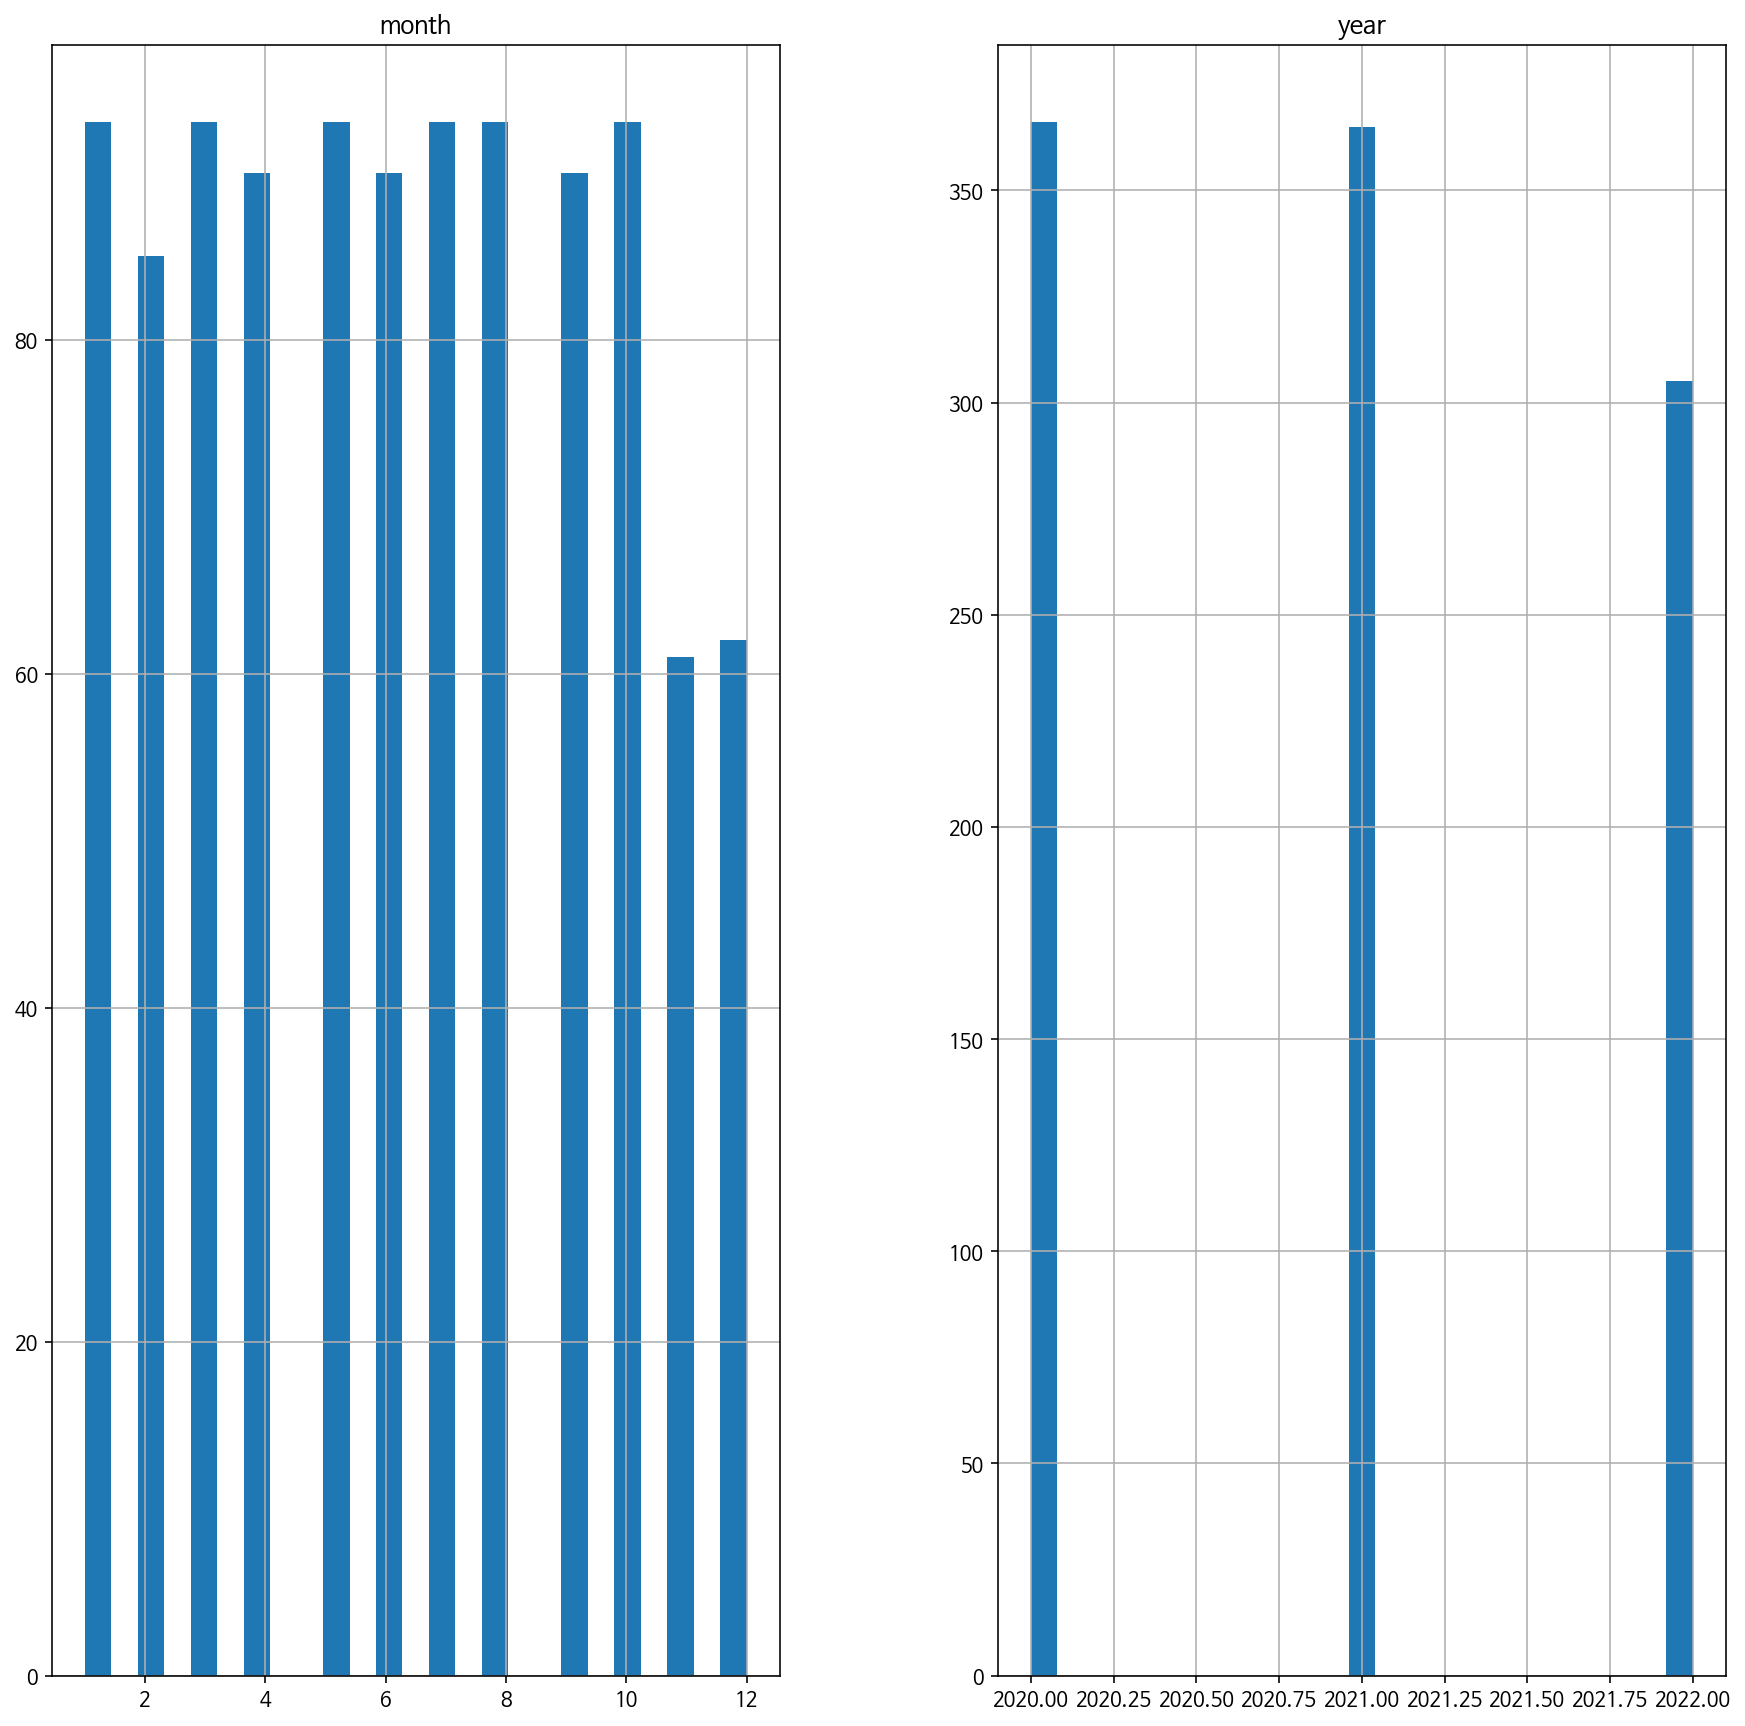

In [ ]:
# 수치 데이터를 히스토그램으로 표현해 본다.
# 수치 데이터를 막대그래프로 표현하기 위해서는 도수분포표를 만들고 이를 시각화 하는 것이 히스토그램이다.
df.hist(figsize = (15,15), bins=25)

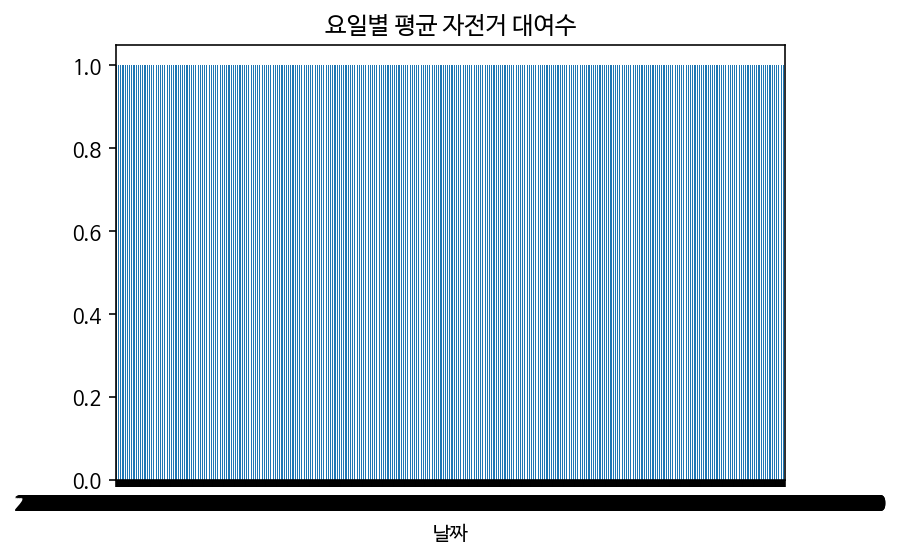

In [ ]:
# df_rent.groupby('날짜')[''].mean().plot.bar(
#     title="요일별 평균 자전거 대여수", rot=0)

In [ ]:
# df_rent.groupby('대여연도')['대여수'].mean().plot.bar(rot=0)

KeyError: ignored

In [ ]:
df_rent.groupby('대여일자')['대여수'].mean().plot(rot=30, figsize=(15, 5))

In [ ]:
df_rent_2017 = df_rent[df_rent["대여연도"] == 2017]
df_rent_2017.groupby('대여월')['대여수'].mean().plot.bar(rot=0)

In [ ]:
df_rent.groupby('대여월')['대여수'].mean().plot.bar(rot=0)

In [ ]:
# 대여연도와 월별 대여수 평균을 구한다.
df_rent.groupby('대여연월')['대여수'].mean()

In [ ]:
df_rent.groupby('대여연월')['대여수'].mean().plot.bar(rot=30, figsize=(15, 5))

In [ ]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
sns.barplot(data=df_rent, x="대여연월", y="대여수")
sns.pointplot(data=df_rent, x="대여연월", y="대여수")

In [ ]:
df_rent.groupby('대여연월')['대여수'].mean().plot(rot=30, figsize=(15, 5))

In [ ]:
fig,axs = plt.subplots(3,1)

df_rent["대여일"].plot(figsize = (15,8), title = "일별", ax = axs[0])
df_rent["대여월"].plot(figsize = (15,8), title = "월별", ax = axs[2])

### 분석데이터의 저장

In [ ]:
# 엑셀 파일 출력
df_rent.to_excel('/content/drive/MyDrive/파이썬_시계열/bike-station-207.xlsx')

## 시계열 본격분석

In [ ]:
# main_data 직접 불러오기(필요시 실행)
import pandas as pd
df_rent = pd.read_excel("/content/drive/MyDrive/파이썬_시계열/bike-station-207.xlsx", index_col = 0) # index_col = 0 unnamed 컬럼명 제거거
df_rent.shape

In [ ]:
df_rent.head(6)

In [ ]:
df_rent_day = df_rent.groupby(["대여일자"])["대여수"].mean()
df_rent_day.head()

In [ ]:
["대여일자"]
#print(type(["대여일자"]))

### series 연습

In [ ]:
# https://researchdatapod.com/how-to-solve-python-typeerror-series-object-is-not-callable/
# http://daplus.net/python-pandas-%EC%8B%9C%EB%A6%AC%EC%A6%88%EB%A5%BC-dataframe%EC%9C%BC%EB%A1%9C-%EB%B3%80%ED%99%98/
import pandas as pd
pizzas = {'margherita': 10.99 , 'pepperoni': 11.99, 'marinara': 7.99}
pizzas

In [ ]:
ser = pd.Series(data=pizzas)
ser
#print(ser.index())

In [ ]:
print(ser['marinara'])
print(type(ser['marinara']))

In [ ]:
#type(df_rent_day(["대여일자"]))
#df_rent_day(["대여일자"])
#df_rent_day["대여일자"].value_counts()

In [ ]:
df_rent_month = df_rent.groupby(["대여연월"])["대여수"].mean()
df_rent_month.head()

## Simple Moving Average

참고사이트  
https://wikidocs.net/152788

In [ ]:
#df_rent_day.columns, series이기 때문에 해당 명령어를 실행하면 에러가 발생

In [ ]:
# df_rent_day=pd.DataFrame(df_rent_day).reset_index() # reset_index() 이상한 인덱스 형태 정리리
# df_rent_day
# df_rent_day = df_rent_day.to_frame().reset_index()
# df_rent_day

In [ ]:
# Determine rolling statistics
# 30일치 rolling mean을 구해서 시각화 합니다.
rolmean = df_rent_day.rolling(window=12).mean()  # 열 기준으로 계산할 경우 행의 수
# window size 30 denotes 30 days, giving rolling mean at monthly level
rolstd = df_rent_day.rolling(window=12).std()

In [ ]:
# # # 데이터 프레임으로 변환했을 경우
# rolmean = df_rent_day["대여수"].rolling(window=12).mean()  # 열 기준으로 계산할 경우 행의 수
# # window size 30 denotes 30 days, giving rolling mean at monthly level
# rolstd = df_rent_day["대여수"].rolling(window=12).std()

In [ ]:
rolmean

In [ ]:
rolstd

In [ ]:
import matplotlib.pyplot as plt

df_rent_day.plot(label='Original')
rolmean.plot(label='Rolling Mean')
rolstd.plot(label='Rolling Std', figsize=(15, 5))

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

## Weighted Moving Average
* exponentially-weighted-windows
* [Computational tools — pandas 0.25.0 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows)

In [ ]:
df_rent['WMA12'] = df_rent['대여수'].ewm(span=12).mean()
df_rent['WMA6'] = df_rent['대여수'].ewm(span=6).mean()

In [ ]:
df_rent[['대여일자', '대여수', 'WMA6','WMA12']].plot(x='대여일자', figsize=(15,5))

## Simple Exponential Smoothing

In [ ]:
# 데이터셋을 train과 test 로 나눈다.
train = pd.DataFrame(df_rent_day[:800])
test = pd.DataFrame(df_rent_day[800:])

In [ ]:
train["대여수"].plot(figsize=(15,5))
test["대여수"].plot(title='train과 test세트로 분할')

In [ ]:
# import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(pd.np.asarray(train['대여수'].astype(np.float)))

In [ ]:
ses_result = ses_model.fit()
ses_result

In [ ]:
y_hat = test.copy()
y_hat['SES'] = ses_result.forecast(len(test))
y_hat['SES'][:3]

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train['대여수'], label='Train')
plt.plot(test['대여수'], label='Test')
plt.plot(y_hat['SES'], label='Simple Exp Smoothing')
plt.legend()

In [ ]:
rmse = {}
# root mean squared error 로 오차를 계산해 본다.
rmse["SES"] = np.sqrt(np.square(test['대여수'] - y_hat['SES']).mean())
rmse["SES"]

## Expanding

In [ ]:
# Expanding
df_rent['대여수'].expanding(min_periods=1).mean().plot(figsize=(15,5))

### Dickey–Fuller test

In [ ]:
# 결과의 p-value 가 5%를 벗어나기 때문에 non-stationary 데이터라고 볼 수 있다.
# AIC - 회귀에서 예측변수(predictor)를 고를 때 사용하며, 아카이케(Akaike)의 정보 기준(AIC; Akaike’s information Criterion)
# AIC 출처 : [8.6 추정과 차수 선택 | Forecasting: Principles and Practice](https://otexts.com/fppkr/arima-estimation.html)
from statsmodels.tsa.stattools import adfuller
# Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df_rent['대여수'], autolag='AIC')
dfoutput = pd.Series(
    dftest[0:4], 
    index=['Test Statistic',
           'p-value',
           '#Lags Used',
           'Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

## Time Series data Decomposition(시계열 데이터 분해)
* Seasonal
* Trend
* Residual(random, remainder)

## Additive Model

* 값을 더해서 구한다.

$y_t = Level + Trend + Seasonality + Noise$


In [ ]:
from statsmodels.api import tsa

# Additive model
res = tsa.seasonal_decompose(df_rent["대여수"], freq=30, model="additive")
fig = res.plot()

## Multiplicative Model
*  값을 곱해서 구한다.

$y_t = Level \times Trend \times Seasonality \times Noise$

In [ ]:
# multiplicative
res = tsa.seasonal_decompose(df_rent["대여수"], freq=7, model="multiplicative")
fig = res.plot()

## ACF, PACF
* ARIMA 모델 사용시 lag 값에 따른 절단값으로 p,d,q값을 찾기 위해 그려본다.
* AUTO.ARIMA 함수를 사용하여 최적화된 파라미터를 찾을 수도 있다.

## ACF : 자기상관 함수 AutoCorrelation Function

## PACF : 부분 자기상관 함수 Partial AutoCorrelation Function 

* p – Lag value where the PACF chart crosses the upper confidence interval for the first time.
* q – Lag value where the ACF chart crosses the upper confidence interval for the first time.

* 참고 : [Detecting stationarity in time series data - Towards Data Science](https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638)

In [ ]:
from statsmodels.graphics import tsaplots
# lag는 0부터 설정할 수 있으나 너무 낮으면  그래프를 보기 어렵다.
# 0은 제외하고 본다.

ax1 = plt.subplot(211)
tsaplots.plot_acf(df_rent["대여수"], lags=30, ax=ax1)
ax2 = plt.subplot(212)
tsaplots.plot_pacf(df_rent["대여수"], lags=30, ax=ax2)
plt.tight_layout()

## Seasonal ARIMA
* 참고 : [An End-to-End Project on Time Series Analysis and Forecasting with Python](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b)

### Trend
* p: Trend autoregression order. AR(p)모형의 p차수
* d: Trend difference order. 트랜드를 제거하여 안정시계열로 만들기 위한 I(d)의 차분 차수 d
* q: Trend moving average order. MA(q)의 q차수 

### Seasonal
* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
m = 7
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]
seasonal_pdq

In [ ]:
# Grid Search와 유사하게 최적의 파라메터 값을 찾는다.
y = train['대여수'].to_list()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            results = mod.fit()
            print(f"ARIMA{param}x{param_seasonal}{m} - AIC:{results.aic}")
        except:
            continue

In [ ]:
# ARIMA(p,d,q)(P,D,Q)m
# ARIMA(1, 1, 1)x(0, 1, 1, 7)7 - AIC:10083.141308943608
arima = tsa.statespace.SARIMAX(train['대여수'].to_list(),
                                  order=(1,1,1),
                                  seasonal_order=(0,1,1,7),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
# 학습
arima_result = arima.fit()
print(arima_result.summary().tables[1])

In [ ]:
arima_result.plot_diagnostics(figsize=(15, 10))

In [ ]:
# 예측
predict_value = arima_result.predict(start=801, end=880, dynamic=True)
predict_value[:5]

In [ ]:
y_hat['ARIMA'] = predict_value
y_hat['ARIMA'].head()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train['대여수'], label='Train')
plt.plot(test['대여수'], label='Test')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()

In [ ]:
# root mean squared error 로 오차를 계산해 본다.
rmse["ARIMA"] = np.sqrt(np.square(test['대여수'] - y_hat['ARIMA']).mean())
rmse["ARIMA"]

In [ ]:
rmse

## fbprophet
* 공식문서 : https://facebook.github.io/prophet/docs/quick_start.html#python-api
* https://anaconda.org/conda-forge/fbprophet
* conda install -c conda-forge fbprophet
* pip로 설치한다면 pystan이 설치되어 있어야 함

In [ ]:
!pip install pystan
!pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
p_train = train.reset_index().copy()
p_train.columns = ["ds", "y"]
p_train["y"] = np.log(p_train["y"])
p_train.head()

In [ ]:
m = Prophet(daily_seasonality=True)
m.fit(p_train)

In [ ]:
future = m.make_future_dataframe(periods=80)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
df_forecast = forecast[['ds', 'yhat']]
df_plt_forecast = df_forecast.set_index('ds')
df_plt_forecast.shape

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(np.log(train['대여수']), label='Train')
plt.plot(np.log(test['대여수']), label='Test')
plt.plot(df_plt_forecast['yhat'], label='fbprophet')
plt.legend()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
# plotly 가 설치되어 있지 않다면 아래의 명령어로 설치가 필요하다.
# 아나콘다에 설치 시 : conda install -c plotly plotly 
from fbprophet.plot import plot_plotly
import plotly.offline as py

py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)